In [1]:
import warnings

from opticalglass.glass import get_filepath

import opticalglass as og
import opticalglass.buchdahl as buchdahl
import opticalglass.glass as ogl
from opticalglass.glassfactory import create_glass
from opticalglass import cdgm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build Multi-Index for CDGM

In [2]:
catalog = 'CDGM'
gname4 = 'H-K5'
gname3 = 'H-FK61'
gname1 = 'H-K9L'
gname2 = 'D-ZLaF85L'
gname = 'H-ZF11'

In [3]:
cat_pd = cdgm.CDGMCatalog("CDGM202409.xlsx")
cat_df = cat_pd.df

In [4]:
cat_df.T

glass                                     H-FK55    H-FK61   H-FK61B  \
category                     data item                                 
Code                         NaN          550752    497816    497816   
refractive indices           2325.42    1.530079  1.479611  1.479458   
                             1970.09    1.533622  1.482755  1.482653   
                             1529.58     1.53745  1.486141  1.486087   
                             1060.0     1.541548  1.489709  1.489691   
...                                          ...       ...       ...   
dn/dt relative(10-6/℃) for g -60~-40        -5.4      -5.4      -5.0   
Melt Frequency               NaN               C        MA        MA   
Relative Price               NaN             151        80        74   
Glass                        NaN          H-FK55    H-FK61   H-FK61B   
Remarks                      NaN            <NA>      <NA>      <NA>   

glass                                     H-FK71   H-FK95N     H-QK1  \
category                     data item                                 
Code                         NaN          457903    438945    470669   
refractive indices           2325.42    1.441501  1.423863  1.444945   
                             1970.09    1.444281  1.426473  1.450447   
                             1529.58    1.447265  1.429266  1.456108   
                             1060.0     1.450365  1.432152  1.461485   
...                                          ...       ...       ...   
dn/dt relative(10-6/℃) for g -60~-40        -5.2      -5.1       0.1   
Melt Frequency               NaN               A         A         D   
Relative Price               NaN             124       158        98   
Glass                        NaN          H-FK71   H-FK95N     H-QK1   
Remarks                      NaN            <NA>      <NA>      <NA>   

glass                                     H-QK3L      H-K1      H-K2  \
category                     data item                                 
Code                         NaN          487704    500621    500660   
refractive indices           2325.42     1.46177  1.474764  1.473266   
                             1970.09    1.467372  1.479629  1.479079   
                             1529.58    1.473126  1.484741  1.485081   
                             1060.0     1.478559  1.489886   1.49081   
...                                          ...       ...       ...   
dn/dt relative(10-6/℃) for g -60~-40        -1.9      <NA>       3.3   
Melt Frequency               NaN              MA         D         D   
Relative Price               NaN              23       126        61   
Glass                        NaN          H-QK3L      H-K1      H-K2   
Remarks                      NaN            <NA>      <NA>      <NA>   

glass                                       H-K3  ...          D-ZLaF81  \
category                     data item            ...                     
Code                         NaN          505647  ...            809410   
refractive indices           2325.42    1.476253  ...           1.76399   
                             1970.09    1.482372  ...          1.770858   
                             1529.58    1.488675  ...          1.778417   
                             1060.0      1.49466  ...          1.787155   
...                                          ...  ...               ...   
dn/dt relative(10-6/℃) for g -60~-40         2.8  ...               7.9   
Melt Frequency               NaN               D  ...                 D   
Relative Price               NaN              61  ...               123   
Glass                        NaN            H-K3  ...          D-ZLaF81   
Remarks                      NaN            <NA>  ...  anneal rate 4℃/h   

glass                                         D-ZLaF81-25         D-ZLaF85A  \
category                     data item                                        
Code                         NaN                   8084

In [5]:
cat_df.columns.has_duplicates

False

In [6]:
cat_df.columns.levels[0]

Index(['Code', 'D0', 'D1', 'D2', 'E0', 'E1', 'Glass', 'Melt Frequency',
       'P'C',s', 'P'd,C'', 'P'e,d', 'P'g,F'', 'P'i,h', 'P's,t', 'PC,s', 'Pd,C',
       'Pe,d', 'Pg,F', 'Pi,h', 'Ps,t', 'Relative Price', 'Remarks',
       'abbe number', 'chemical properties', 'dispersion coefficients',
       'dn/dt relative(10-6/℃) for C'', 'dn/dt relative(10-6/℃) for F'',
       'dn/dt relative(10-6/℃) for d', 'dn/dt relative(10-6/℃) for e',
       'dn/dt relative(10-6/℃) for g', 'dn/dt relative(10-6/℃) for t',
       'internal transmission mm, 10', 'mechanical properties', 'nF - nC',
       'nF'- nC'', 'refractive indices', 'specific gravity',
       'thermal properties', 'ΔPC,s', 'ΔPC,t', 'ΔPF,e', 'ΔPg,F', 'λ70 /λ5',
       'λ80 /λ5', 'λTK(μm)', 'τ(5mm)'],
      dtype='object', name='category')

In [7]:
nd = cat_df['refractive indices']['d'].to_numpy(dtype=float)
nF = cat_df['refractive indices']['F'].to_numpy(dtype=float)
nC = cat_df['refractive indices']['C'].to_numpy(dtype=float)

In [8]:
nd, coefs = buchdahl.calc_buchdahl_coords(nd, nF, nC)

In [9]:
coefs /= np.array((nd - 1.0), dtype=float)

In [10]:
len(nC)

321

## Test Series extracted from DataFrame

In [11]:
gla = cat_df.loc[gname]
gla1 = cat_df.loc[gname4]

In [13]:
gla['dispersion coefficients']

data item
K1      1.598681
L1      0.012606
K2      0.189449
L2      0.061789
K3      1.268702
L3    121.376823
A0          <NA>
A1          <NA>
A2          <NA>
A3          <NA>
A4          <NA>
A5          <NA>
Name: H-ZF11, dtype: object

In [65]:
pd.notna(gla['dispersion coefficients'].loc['K1'])

True

In [66]:
pd.notna(gla['dispersion coefficients'].loc['A0'])

False

In [67]:
type(gla1)

pandas.core.series.Series

In [68]:
gla1['dispersion coefficients']

data item
K1        <NA>
L1        <NA>
K2        <NA>
L2        <NA>
K3        <NA>
L3        <NA>
A0    2.250184
A1   -0.008941
A2    0.011432
A3   -0.000073
A4    0.000035
A5   -0.000002
Name: H-K5, dtype: object

In [69]:
pd.notna(gla1['dispersion coefficients'].loc['K1'])

False

In [70]:
pd.notna(gla1['dispersion coefficients'].loc['A0'])

True

In [71]:
def decode_dispersion_coefs(glas):
    dispersion_coefs = glas['dispersion coefficients']
    if pd.notna(dispersion_coefs.loc['K1']):
        coefs = dispersion_coefs.loc['K1':'L3'].to_numpy(dtype=float)
        interp_formula = "sellmeier"
    else:  # pd.notna(glas['dispersion coefficients'].loc['A0'])
        coefs = dispersion_coefs.loc['A0':'A5'].to_numpy(dtype=float)
        interp_formula = "schott"

    return coefs, interp_formula

In [72]:
decode_dispersion_coefs(gla)

(array([1.59868051e+00, 1.26057844e-02, 1.89448887e-01, 6.17894718e-02,
        1.26870155e+00, 1.21376823e+02]),
 'sellmeier')

In [73]:
decode_dispersion_coefs(gla1)

(array([ 2.25018356e+00, -8.94066156e-03,  1.14317829e-02, -7.33393278e-05,
         3.49616695e-05, -1.80100775e-06]),
 'schott')

In [74]:
cat_df.loc[gname]['internal transmission mm, 10']

data item
2400      0.838
2200.0    0.889
2000.0    0.945
1800.0    0.968
1600.0     0.99
1400.0    0.993
1200.0    0.998
1060.0    0.998
1000.0    0.998
950.0     0.998
900.0     0.998
850.0     0.998
800.0     0.998
700.0     0.996
650.0     0.996
600.0     0.996
550.0     0.994
500.0      0.99
480.0     0.988
460.0     0.984
440.0     0.978
420.0     0.969
400.0     0.932
390.0     0.875
380.0     0.725
370.0     0.378
360.0     0.034
350.0      <NA>
340.0      <NA>
330.0      <NA>
320.0      <NA>
310.0      <NA>
300.0      <NA>
290.0      <NA>
280.0       NaN
Name: H-ZF11, dtype: object

In [75]:
cat_df.loc[gname]['refractive indices'].array

<NumpyExtensionArray>
[np.float64(1.653752), np.float64(1.659667), np.float64(1.666431),
 np.float64(1.674944), np.float64(1.676081), np.float64(1.681178),
 np.float64(1.688512), np.float64(1.692201), np.float64(1.693253),
 np.float64(1.694243), np.float64(1.698738),  np.float64(1.69894),
 np.float64(1.704431),  np.float64(1.71546), np.float64(1.716881),
 np.float64(1.729483),    np.float64(1.742), np.float64(1.765684),
                 <NA>,                 <NA>]
Length: 20, dtype: object

In [76]:
cat_df.loc[gname]['refractive indices'].index

Index(['2325.42', '1970.09', '1529.58', '1060.0', 't', 's', 'r', 'C', 'C'',
       'He-Ne', 'D', 'd', 'e', 'F', 'F'', 'g', 'h', 'i', '313.18', '302.15'],
      dtype='object', name='data item')

## Test factory method, create_glass

In [77]:
gname2, catalog

('D-ZLaF85L', 'CDGM')

In [78]:
gla2 = create_glass(gname2, catalog)

In [79]:
wvls = gla2.glass_data()['refractive indices'].index; wvls

Index(['2325.42', '1970.09', '1529.58', '1060.0', 't', 's', 'r', 'C', 'C'',
       'He-Ne', 'D', 'd', 'e', 'F', 'F'', 'g', 'h', 'i', '313.18', '302.15'],
      dtype='object', name='data item')

In [80]:
wvls = wvls[4:-2]

In [81]:
for w_str in wvls:
    n_line = gla2.meas_rindex(w_str)
    try:
        n_intrp = gla2.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, no measured data')
    else:
        print(f'{w_str}: {n_line}, {n_intrp:9.6f}, {n_intrp-n_line:8.2g}')

t: 1.831927,  1.831927, -1.3e-07
s: 1.83695,  1.836950, -4.8e-07
r: 1.843982,  1.843982,  3.5e-07
C: 1.847455,  1.847455,  8.1e-08
C': 1.848438,  1.848438, -6.9e-08
He-Ne: 1.84936,  1.849360,  2.9e-07
D: 1.853515,  1.853515, -9.9e-08
d: 1.8537,  1.853700,  4.4e-08
e: 1.858699,  1.858699, -3.9e-07
F: 1.868493,  1.868493, -1.6e-07
F': 1.86973,  1.869730,  1.7e-07
g: 1.880452,  1.880452, -3.3e-07
h: 1.890629,  1.890629,  8.8e-08
i: 1.908518,  1.908519,  5.7e-07


In [82]:
gla2.meas_rindex(wvls).array

<NumpyExtensionArray>
[np.float64(1.831927),  np.float64(1.83695), np.float64(1.843982),
 np.float64(1.847455), np.float64(1.848438),  np.float64(1.84936),
 np.float64(1.853515),   np.float64(1.8537), np.float64(1.858699),
 np.float64(1.868493),  np.float64(1.86973), np.float64(1.880452),
 np.float64(1.890629), np.float64(1.908518)]
Length: 14, dtype: object

In [83]:
gla2.rindex(wvls[4:-2])

array([1.84843793, 1.84936029, 1.8535149 , 1.85370004, 1.85869861,
       1.86849284, 1.86973017, 1.88045167])

In [84]:
gla2.meas_rindex(wvls).array-gla2.rindex(wvls)

<NumpyExtensionArray>
[ np.float64(1.3261660636310069e-07),   np.float64(4.826590294104705e-07),
  np.float64(-3.475699688060274e-07),  np.float64(-8.122045813685475e-08),
   np.float64(6.858039647283931e-08), np.float64(-2.9140739221666934e-07),
   np.float64(9.883907137187009e-08),   np.float64(-4.39173528654635e-08),
  np.float64(3.8642454436299545e-07),  np.float64(1.5529491625976277e-07),
 np.float64(-1.7370021843099437e-07),  np.float64(3.3439356750264437e-07),
  np.float64(-8.778562921030186e-08),  np.float64(-5.735073635992904e-07)]
Length: 14, dtype: object

In [85]:
cat_df.loc[gname]['specific gravity']['d']

np.float64(2.95)

In [86]:
cat_df.loc[gname]['chemical properties']

data item
DW       1
DA       1
CR       1
RC(S)    2
RA(S)    1
Name: H-ZF11, dtype: object

In [87]:
cat_df.loc[gname]['thermal properties']

data item
Tg(℃)                 576
Ts(℃)                 613
T1014.5(℃)            517
T1013(℃)              551
T107.6(℃)             672
α-30/70℃(10-7/K)       90
α100/300℃(10-7/K)     113
λ[W/(m·K)]           <NA>
Name: H-ZF11, dtype: object

In [88]:
cat_df.loc[gname]['mechanical properties']

data item
HK(107Pa)        521
FA               175
E(107Pa)        8410
G(107Pa)        3371
μ              0.248
B(10-12/Pa)     2.73
Name: H-ZF11, dtype: object

In [89]:
cat_df.loc[[gname, gname1]]['mechanical properties']['HK(107Pa)']

glass
H-ZF11    521
H-K9L     595
Name: HK(107Pa), dtype: Int64

In [90]:
cat_df.loc[gname1]['internal transmission mm, 10']

data item
2400      0.709
2200.0    0.778
2000.0    0.904
1800.0    0.957
1600.0    0.987
1400.0    0.975
1200.0    0.998
1060.0    0.998
1000.0    0.998
950.0     0.998
900.0     0.998
850.0     0.998
800.0     0.998
700.0     0.997
650.0     0.997
600.0     0.997
550.0     0.997
500.0     0.997
480.0     0.997
460.0     0.997
440.0     0.997
420.0     0.997
400.0     0.997
390.0     0.996
380.0     0.995
370.0     0.995
360.0     0.992
350.0     0.982
340.0     0.974
330.0     0.951
320.0     0.894
310.0     0.776
300.0     0.557
290.0     0.275
280.0       NaN
Name: H-K9L, dtype: object

In [91]:
cat_df['refractive indices']['d'].array

<FloatingArray>
[ 1.5502,   1.497,   1.497,  1.4565,  1.4378, 1.47047, 1.48749, 1.49967,
 1.50047, 1.50463,
 ...
  1.8088, 1.80757, 1.85222,  1.8511, 1.84558, 1.84443,  1.8537,  1.8526,
  1.8545, 1.85344]
Length: 321, dtype: Float64

In [92]:
trns_data = cat_df.loc[[gname, gname1]]['internal transmission mm, 10'].T; trns_data

glass,H-ZF11,H-K9L
data item,,
2400,0.838,0.709
2200.0,0.889,0.778
2000.0,0.945,0.904
1800.0,0.968,0.957
1600.0,0.99,0.987
1400.0,0.993,0.975
1200.0,0.998,0.998
1060.0,0.998,0.998
1000.0,0.998,0.998


<Axes: xlabel='data item'>

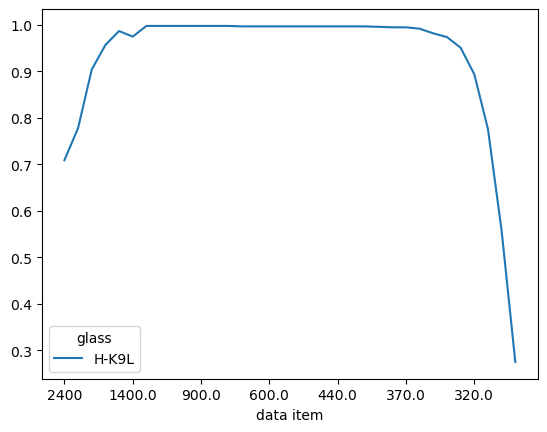

In [93]:
trns_data.plot()

<Axes: xlabel='data item'>

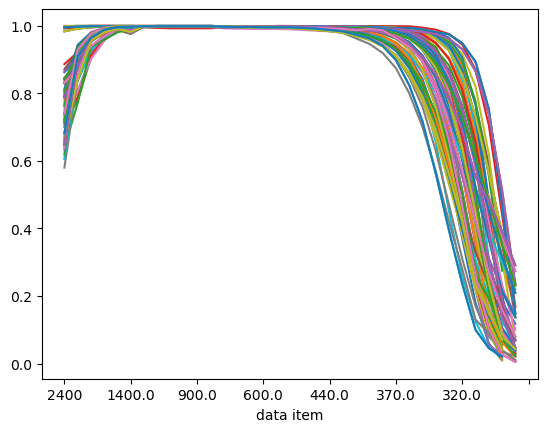

In [94]:
cat_df['internal transmission mm, 10'].T.plot(legend=False)

In [95]:
gla_v2 = cdgm.CDGMGlass(gname)

In [96]:
gla_v2.meas_rindex('F')

np.float64(1.71546)

In [97]:
gla_v2.glass_code()

'699.3'

In [98]:
gla_v2.transmission_data()

(array([2400., 2200., 2000., 1800., 1600., 1400., 1200., 1060., 1000.,
         950.,  900.,  850.,  800.,  700.,  650.,  600.,  550.,  500.,
         480.,  460.,  440.,  420.,  400.,  390.,  380.,  370.,  360.,
         350.,  340.,  330.,  320.,  310.,  300.,  290.,  280.]),
 array([0.838, 0.889, 0.945, 0.968, 0.99 , 0.993, 0.998, 0.998, 0.998,
        0.998, 0.998, 0.998, 0.998, 0.996, 0.996, 0.996, 0.994, 0.99 ,
        0.988, 0.984, 0.978, 0.969, 0.932, 0.875, 0.725, 0.378, 0.034,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]))

In [99]:
gla_v2.glass_data()['internal transmission mm, 10']

data item
2400      0.838
2200.0    0.889
2000.0    0.945
1800.0    0.968
1600.0     0.99
1400.0    0.993
1200.0    0.998
1060.0    0.998
1000.0    0.998
950.0     0.998
900.0     0.998
850.0     0.998
800.0     0.998
700.0     0.996
650.0     0.996
600.0     0.996
550.0     0.994
500.0      0.99
480.0     0.988
460.0     0.984
440.0     0.978
420.0     0.969
400.0     0.932
390.0     0.875
380.0     0.725
370.0     0.378
360.0     0.034
350.0      <NA>
340.0      <NA>
330.0      <NA>
320.0      <NA>
310.0      <NA>
300.0      <NA>
290.0      <NA>
280.0       NaN
Name: H-ZF11, dtype: object

In [100]:
gla_v2.glass_data()['internal transmission mm, 10'][2400.0]

np.float64(0.838)

In [101]:
len(gla_v2.glass_data()['internal transmission mm, 10'])

35

In [102]:
gla_v2.glass_data()['internal transmission mm, 10'].to_numpy(dtype=float, na_value=None)

array([0.838, 0.889, 0.945, 0.968, 0.99 , 0.993, 0.998, 0.998, 0.998,
       0.998, 0.998, 0.998, 0.998, 0.996, 0.996, 0.996, 0.994, 0.99 ,
       0.988, 0.984, 0.978, 0.969, 0.932, 0.875, 0.725, 0.378, 0.034,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan])